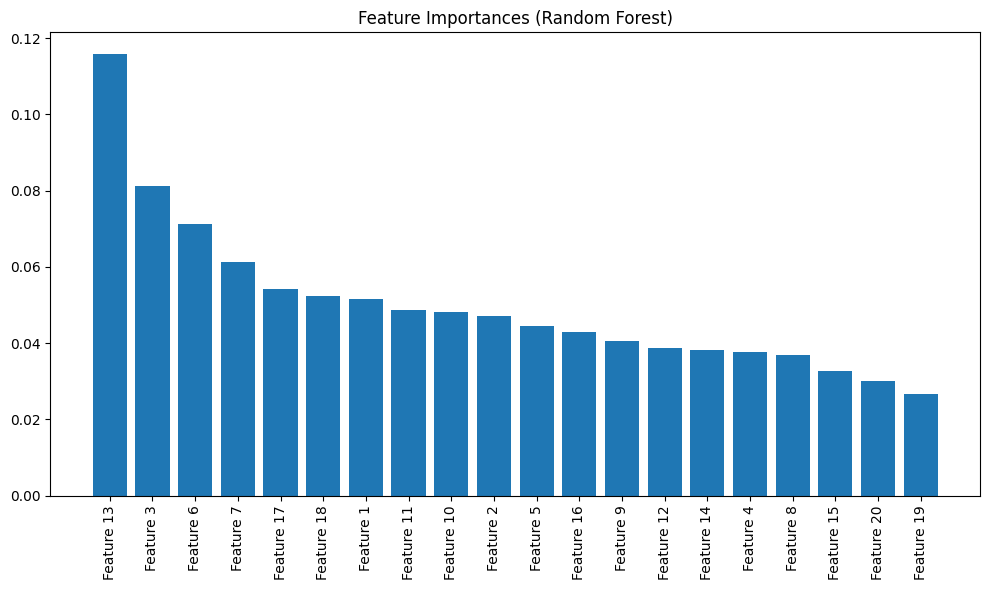

Random Forest Accuracy: 0.9000


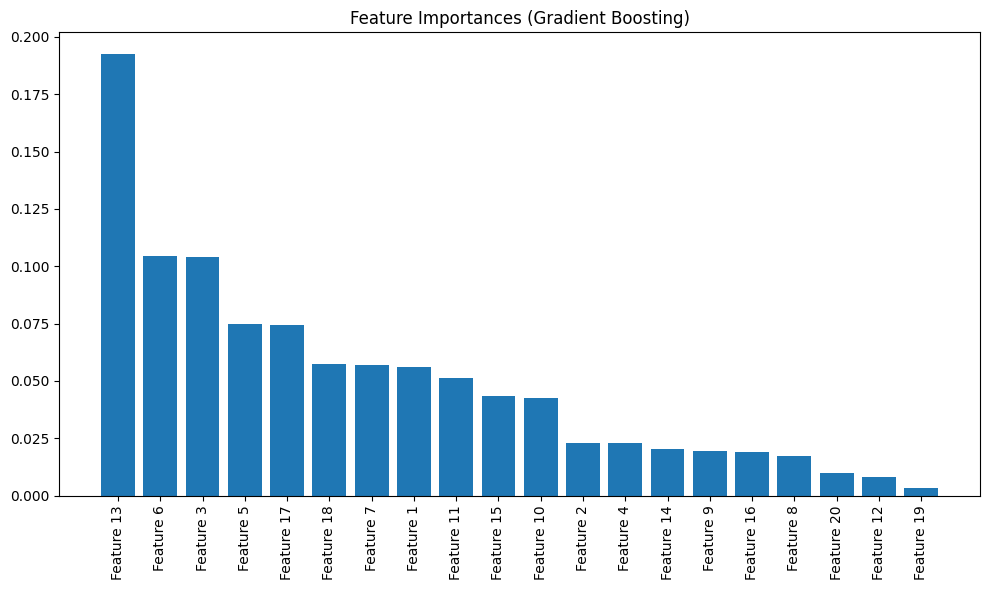

Gradient Boosting Accuracy: 0.9100
Stacking Classifier Accuracy: 0.9000
Voting Classifier Accuracy: 0.8950
All visualizations have been saved as PNG files.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

def save_plot(fig, filename):
    plt.show()
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close(fig)

# Generate a random dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_feature_importances(model, title, filename):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(title)
    ax.bar(range(X.shape[1]), importances[indices])
    ax.set_xticks(range(X.shape[1]))
    ax.set_xticklabels([f"Feature {i+1}" for i in indices], rotation=90)
    plt.tight_layout()
    save_plot(fig, filename)

def random_forest():
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    plot_feature_importances(rf, "Feature Importances (Random Forest)", 'random_forest_importances.png')
    print(f"Random Forest Accuracy: {rf.score(X_test, y_test):.4f}")

def gradient_boosting():
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
    gb.fit(X_train, y_train)
    plot_feature_importances(gb, "Feature Importances (Gradient Boosting)", 'gradient_boosting_importances.png')
    print(f"Gradient Boosting Accuracy: {gb.score(X_test, y_test):.4f}")

def stacking():
    base_models = [
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ]
    meta_model = LogisticRegression()
    stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
    stacking_clf.fit(X_train, y_train)
    print(f"Stacking Classifier Accuracy: {stacking_clf.score(X_test, y_test):.4f}")

def voting():
    model1 = LogisticRegression(random_state=42)
    model2 = DecisionTreeClassifier(random_state=42)
    model3 = SVC(probability=True, random_state=42)
    voting_clf = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('svc', model3)], voting='soft')
    voting_clf.fit(X_train, y_train)
    print(f"Voting Classifier Accuracy: {voting_clf.score(X_test, y_test):.4f}")

if __name__ == "__main__":
    random_forest()
    gradient_boosting()
    stacking()
    voting()
    print("All visualizations have been saved as PNG files.")